In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
%config InlineBackend.figure_format='jpeg'

In [2]:
# El seaborn tambien tiene que setearse su environment
sns.set_context(
"notebook"
,font_scale=1.5
,rc={
    "figure.figsize":(11,8)
    ,"axes.titlesize":18
})
from matplotlib import rcParams
rcParams['figure.figsize']=11,8

In [3]:
# cargar la data
df=pd.read_csv('data/mlbootcamp5_train.csv',sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


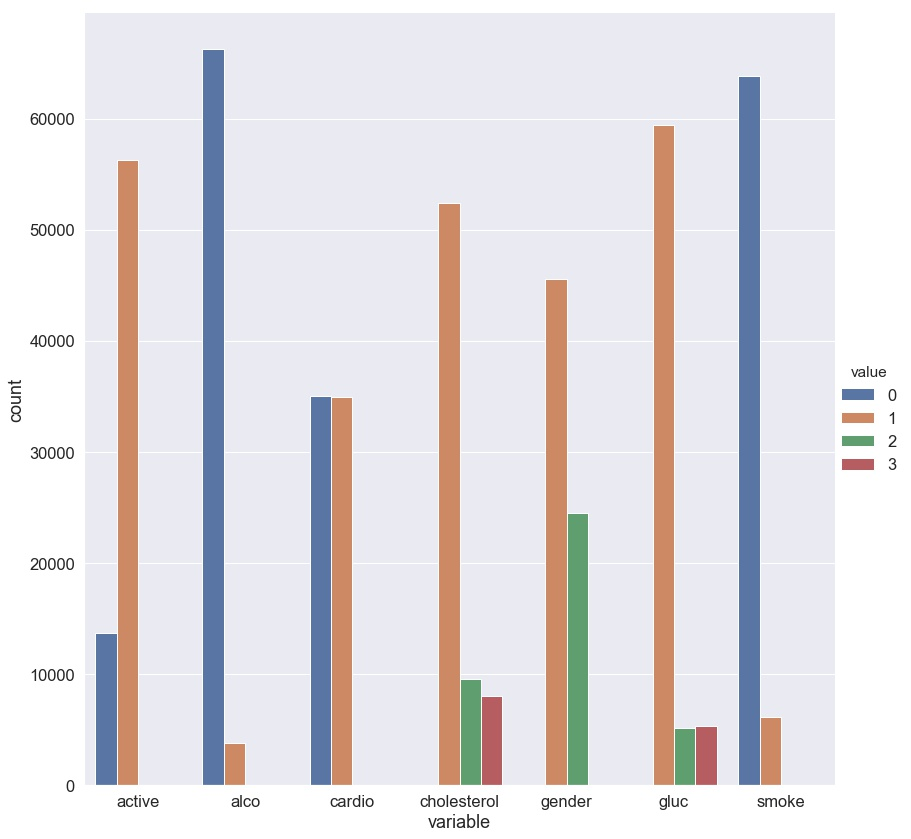

In [4]:
df_uniques=pd.melt(frame=df
                  ,value_vars=['gender','cholesterol','gluc','smoke','alco','active','cardio'])
df_uniques=pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count()) \
.sort_index(level=[0,1]) \
.rename(columns={'value':'count'}) \
.reset_index()

sns.catplot(x='variable' #antes factorplot
              ,y='count'
              ,hue='value'
              ,data=df_uniques
              ,kind='bar'
              ,height=12) #antes size

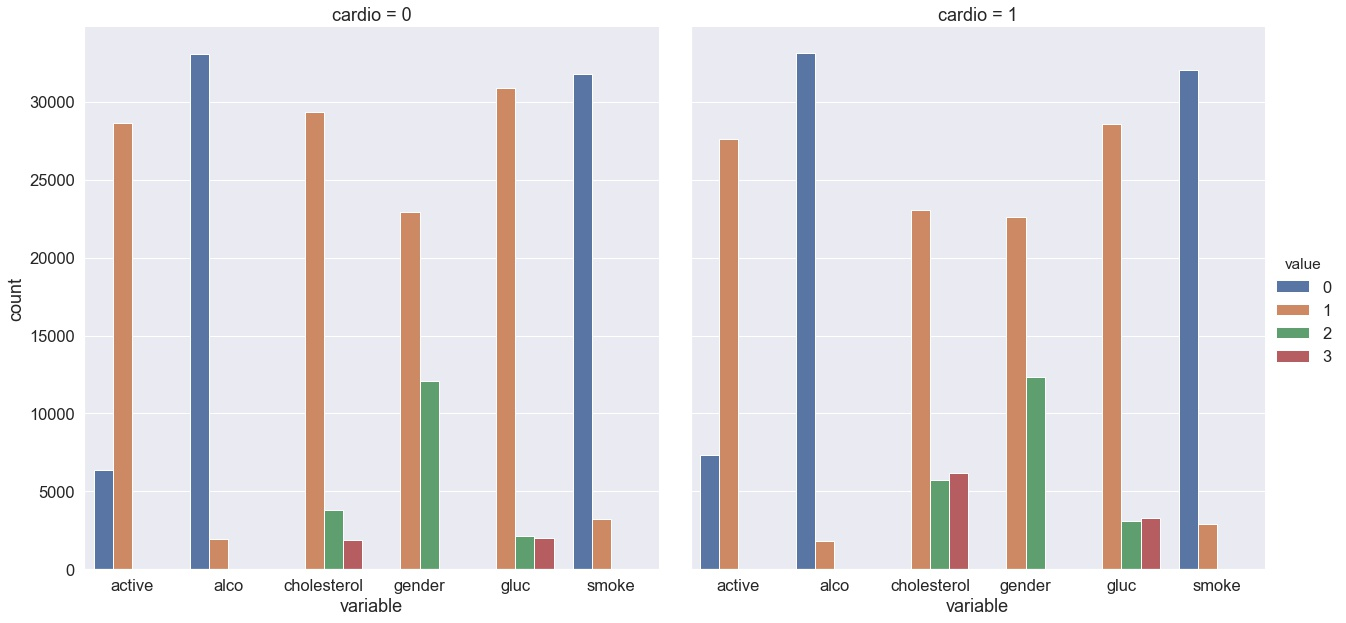

In [8]:
df_uniques=pd.melt(frame=df
                  ,value_vars=['gender','cholesterol','gluc','smoke','alco','active']
                  ,id_vars=['cardio'])
df_uniques=pd.DataFrame(df_uniques.groupby(['variable','value','cardio'])['value'].count()) \
    .sort_index(level=[0,1]) \
    .rename(columns={'value':'count'}) \
    .reset_index()

sns.catplot(x='variable'
              ,y='count'
              ,hue='value'
              ,col='cardio'
              ,data=df_uniques
              ,kind='bar'
              ,height=9);

In [10]:
for c in df.columns:
    n=df[c].nunique()
    print(c)
    if n>3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10*'-')

id
70000 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (8, 1), (9, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (18, 1), (21, 1), (23, 1), (24, 1), (25, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (49, 1), (51, 1), (52, 1), (53, 1), (54, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (77, 1), (79, 1), (81, 1), (83, 1), (86, 1), (87, 1), (88, 1), (90, 1), (92, 1), (94, 1), (95, 1), (96, 1), (97, 1), (100, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (111, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (119, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (129, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), 

ap_hi
153 [(-150, 1), (-140, 1), (-120, 2), (-115, 1), (-100, 2), (1, 2), (7, 1), (10, 7), (11, 28), (12, 76), (13, 15), (14, 29), (15, 12), (16, 3), (17, 3), (20, 4), (24, 1), (60, 1), (70, 18), (80, 104), (85, 10), (90, 982), (93, 1), (95, 39), (96, 2), (97, 1), (99, 4), (100, 2581), (101, 4), (102, 9), (103, 9), (104, 6), (105, 64), (106, 10), (107, 7), (108, 10), (109, 9), (110, 8644), (111, 9), (112, 22), (113, 16), (114, 11), (115, 219), (116, 9), (117, 21), (118, 15), (119, 13), (120, 27699), (121, 13), (122, 16), (123, 23), (124, 17), (125, 440), (126, 16), (127, 23), (128, 35), (129, 6), (130, 8961), (131, 10), (132, 14), (133, 8), (134, 15), (135, 210), (136, 17), (137, 8), (138, 20), (139, 10), (140, 9506), (141, 21), (142, 9), (143, 12), (144, 10), (145, 230), (146, 9), (147, 14), (148, 17), (149, 11), (150, 4450), (151, 14), (152, 7), (153, 14), (154, 8), (155, 74), (156, 10), (157, 4), (158, 8), (159, 8), (160, 3036), (161, 3), (162, 8), (163, 6), (164, 8), (165, 43), (16